In [99]:
import pandas as pd

In [100]:
pd.options.display.float_format = '{:,.2f}'.format

In [101]:
rates = pd.read_csv("cleaned/rates.csv")

rates

,jurisdiction,slug,country,location,season,total,mealsAndIncidentals
0,Canada,albania-tirana,Albania,Tirana,NaN,42.38,nan
1,Canada,albania,Albania,Other,NaN,33.90,nan
2,Canada,algeria-algiers,Algeria,Algiers,NaN,134.44,nan
3,Canada,algeria,Algeria,Other,NaN,107.56,nan
4,Canada,angola-luanda,Angola,Luanda,NaN,262.80,nan
5,Canada,angola,Angola,Other,NaN,210.24,nan
6,Canada,anguilla-the-valley,Anguilla,The Valley,NaN,174.44,nan
7,Canada,antigua-and-barbuda-st.-john's,Antigua and Barbuda,St. John's,NaN,226.45,nan
8,Canada,argentina-buenos-aires,Argentina,Buenos Aires,NaN,95.03,nan
9,Canada,argentina,Argentina,Other,NaN,76.02,nan


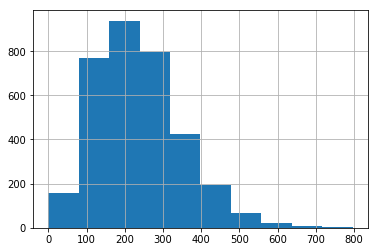

In [102]:
rates['total'].hist()

In [103]:
capitals = pd.read_csv("cleaned/capitals.csv")

capitals

,Short-form name,Long-form name,GENC 2A Code (see Note 2),GENC 3A Code (see Note 2),Capital,slug
0,Afghanistan *+,Islamic Republic of Afghanistan,AF,AFG,Kabul,afghanistan-kabul
1,Albania *+,Republic of Albania,AL,ALB,Tirana,albania-tirana
2,Algeria *+,People's Democratic Republic of Algeria,DZ,DZA,Algiers,algeria-algiers
3,Andorra *+,Principality of Andorra,AD,AND,Andorra la Vella,andorra-andorra-la-vella
4,Angola *+,Republic of Angola,AO,AGO,Luanda,angola-luanda
5,Antigua and\nBarbuda *+,Antigua and Barbuda,AG,ATG,Saint John's,antigua-and-barbuda-saint-john's
6,Argentina *+,Argentine Republic,AR,ARG,Buenos Aires,argentina-buenos-aires
7,Armenia *+,Republic of Armenia,AM,ARM,Yerevan,armenia-yerevan
8,Australia *+,Commonwealth of Australia,AU,AUS,Canberra,australia-canberra
9,Austria *+,Republic of Austria,AT,AUT,Vienna,austria-vienna


In [104]:
rates = rates.loc[rates.groupby(['jurisdiction','slug'])['total'].idxmin(skipna=False)]

us_rates = rates[rates['jurisdiction'] == 'US']

us_rates = us_rates[~us_rates['country'].isin(['AFGHANISTAN','ANTARCTICA','IRAQ','LIBYA','SOMALIA'])].copy()

us_rates = us_rates.merge(capitals[['slug']], on='slug', how='inner').reset_index()

eu_rates = rates[rates['jurisdiction'] == 'EU'].copy()

other_rates = rates[~rates['jurisdiction'].isin(['US','EU'])].copy()

us_vs_other_rates = us_rates.merge(other_rates, on='slug', how='inner').reset_index()

eu_rates['country'] = eu_rates['country'].str.upper()

us_vs_eu_rates = us_rates.merge(eu_rates, on='country', how='inner').reset_index()

us_vs_other_rates = pd.concat([us_vs_other_rates,us_vs_eu_rates], ignore_index=True)

us_vs_other_rates

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y
0,NaN,ALBANIA,Albania,0,US,Canada,0,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,42.38
1,NaN,ALBANIA,ALBANIA,0,US,UK,1,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,223.89
2,NaN,ALBANIA,Albania,0,US,UN,2,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,147.00
3,NaN,ALGERIA,Algeria,1,US,Canada,3,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,134.44
4,NaN,ALGERIA,ALGERIA,1,US,UK,4,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,286.55
5,NaN,ALGERIA,Algeria,1,US,UN,5,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,211.00
6,NaN,ANGOLA,Angola,2,US,Canada,6,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,262.80
7,NaN,ANGOLA,ANGOLA,2,US,UK,7,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,495.84
8,NaN,ANGOLA,Angola,2,US,UN,8,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,400.00
9,NaN,ARGENTINA,Argentina,3,US,Canada,9,Buenos Aires,Buenos Aires,129.00,nan,S1,NaN,argentina-buenos-aires,NaN,NaN,396.00,95.03


In [105]:
us_vs_other_rates['diff'] = (us_vs_other_rates['total_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['total_y']

us_vs_other_rates.loc[us_vs_other_rates['jurisdiction_y'] == 'Canada','diff'] = (us_vs_other_rates['mealsAndIncidentals_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['total_y']


In [106]:
us_vs_other_rates['diff'].describe()

count     488.00
mean       26.28
std       454.48
min        -0.53
25%        -0.04
50%         0.15
75%         0.43
max     9,530.58
Name: diff, dtype: float64

In [107]:
us_vs_other_rates[us_vs_other_rates['diff'] < -10]

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff


In [108]:
us_vs_other_rates[us_vs_other_rates['diff'] > 0.9]

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
0,NaN,ALBANIA,Albania,0,US,Canada,0,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,42.38,1.24
2,NaN,ALBANIA,Albania,0,US,UN,2,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,147.00,0.94
20,NaN,AZERBAIJAN,AZERBAIJAN,7,US,UK,20,Baku,Baku,115.00,nan,S1,NaN,azerbaijan-baku,NaN,NaN,361.00,165.05,1.19
21,NaN,AZERBAIJAN,Azerbaijan,7,US,UN,21,Baku,Baku,115.00,nan,S1,NaN,azerbaijan-baku,NaN,NaN,361.00,179.00,1.02
26,NaN,BANGLADESH,Bangladesh,10,US,UN,26,Dhaka,Dhaka,90.00,nan,S1,NaN,bangladesh-dhaka,NaN,NaN,290.00,139.00,1.09
32,NaN,BELIZE,BELIZE,13,US,UK,32,Belmopan,Belmopan,93.00,nan,S1,NaN,belize-belmopan,NaN,NaN,242.00,117.88,1.05
39,NaN,BRAZIL,BRAZIL,16,US,UK,39,Brasilia,Brasilia,123.00,nan,S1,NaN,brazil-brasilia,NaN,NaN,350.00,164.75,1.12
62,NaN,COLOMBIA,COLOMBIA,27,US,UK,62,Bogota,Bogota,105.00,nan,S1,NaN,colombia-bogota,NaN,NaN,382.00,192.75,0.98
63,NaN,COLOMBIA,Colombia,27,US,UN,63,Bogota,Bogota,105.00,nan,S1,NaN,colombia-bogota,NaN,NaN,382.00,158.00,1.42
100,NaN,ETHIOPIA,Ethiopia,42,US,UN,100,Addis Ababa,Addis Ababa,85.00,nan,S1,NaN,ethiopia-addis-ababa,NaN,NaN,400.00,198.00,1.02


In [109]:
us_vs_other_rates.loc[us_vs_other_rates['slug'].isnull(),'slug'] = us_vs_other_rates['slug_y']

us_vs_other_rates = us_vs_other_rates[us_vs_other_rates['diff'] < 1000]

min_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].min()).reset_index()

min_diff.groupby('jurisdiction_y').describe()

diff                                      
                count mean  std   min   25%   50%  75%  max
jurisdiction_y                                             
Canada         129.00 0.00 0.33 -0.52 -0.21 -0.06 0.11 2.00
EU             129.00 0.24 0.40 -0.53  0.02  0.16 0.36 2.57
UK             113.00 0.35 0.40 -0.46  0.11  0.27 0.51 2.20
UN             115.00 0.38 0.55 -0.50  0.06  0.26 0.59 3.68

In [110]:
max_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].max()).reset_index()

stats = pd.DataFrame(max_diff.groupby('jurisdiction_y').describe())

stats

diff                                      
                count mean  std   min   25%   50%  75%  max
jurisdiction_y                                             
Canada         129.00 0.00 0.33 -0.52 -0.21 -0.06 0.11 2.00
EU             129.00 0.24 0.40 -0.53  0.02  0.16 0.36 2.57
UK             113.00 0.35 0.40 -0.46  0.11  0.27 0.51 2.20
UN             115.00 0.38 0.55 -0.50  0.06  0.26 0.59 3.68

In [111]:
us_vs_other_rates.sample(n=3)

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
117,NaN,GHANA,Ghana,50,US,Canada,117,Accra,Accra,99.00,nan,S1,NaN,ghana-accra,NaN,NaN,331.00,109.93,-0.10
147,NaN,INDIA,India,60,US,UN,147,New Delhi,New Delhi (April - August),109.00,nan,S1,NaN,india-new-delhi,NaN,NaN,400.00,223.00,0.79
191,NaN,MADAGASCAR,MADAGASCAR,80,US,UK,191,Antananarivo,Antananarivo,79.00,nan,S1,NaN,madagascar-antananarivo,NaN,NaN,237.00,211.42,0.12


In [112]:
us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada'].sample(n=1)

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
222,NaN,NAMIBIA,Namibia,91,US,Canada,222,Windhoek,Windhoek,92.00,nan,S1,NaN,namibia-windhoek,NaN,NaN,242.00,76.13,0.21


In [113]:
us_vs_other_rates.to_csv('results.csv')

In [114]:
for index, row in stats.iterrows():
    print('Comparing rates for',round(row['diff']['count']),'cities, the US has a',round(row['diff']['50%']*100,1),'% higher/lower median rate and a',round(row['diff']['mean']*100,1),'% higher/lower average rate than',index)

# Comparing rates for 131 capital cities, Canada has a 6% higher median meals and incidentals rate and a 11 - 12% higher average rate than the U.S.
# Comparing U.S. rates between 132 capital cities and the same number of EU countrywide rates, the EU has a 13% lower median total rate and a 15% higher average rate than the U.S. (this average is skewed heavily by Iraq, Afghanistan and Somalia).
# Comparing rates for 115 capital cities, the UK has a 22% lower median total rate and a 19% lower average rate than the U.S.
# Comparing rates for 119 capital cities, the UN has a 5 - 18% lower median total rate and 13 - 58% higher average rate than the U.S. (skewed heavily by Baghdad, Tripoli and Kabul). The large ranges here appear to be caused by the UN’s practice of paying different rates at different hotels.
 

Comparing rates for 129.0 cities, the US has a -5.9 % higher/lower median rate and a 0.0 % higher/lower average rate than Canada
Comparing rates for 129.0 cities, the US has a 15.7 % higher/lower median rate and a 23.7 % higher/lower average rate than EU
Comparing rates for 113.0 cities, the US has a 27.5 % higher/lower median rate and a 35.5 % higher/lower average rate than UK
Comparing rates for 115.0 cities, the US has a 26.4 % higher/lower median rate and a 38.1 % higher/lower average rate than UN


In [115]:
pd.DataFrame(us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada']['mealsAndIncidentals_x'] > us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada']['total_y'],columns=['higher']).groupby(['higher']).size()

higher
False    78
True     51
dtype: int64